In [8]:
# import shutil

output_filename = "All_checkpoints"
# dir_name = "All_checkpoints"

# shutil.make_archive(output_filename, 'zip', dir_name)

import zipfile
with zipfile.ZipFile(output_filename + '.zip') as thezip:
    thezip.printdir()
    with thezip.open('Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_00003/Training_loss_cosine/epoch_9training_loss_cosine.csv',mode='r') as thefile:
        #Let us verify the operation..
        print(thefile.read())

File Name                                             Modified             Size
Checkpoints/                                   2022-11-17 15:23:28            0
Checkpoints_RANO/                              2023-01-26 11:54:42            0
Checkpoints_RANO/.ipynb_checkpoints/           2021-05-06 11:50:26            0
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/ 2023-01-26 11:56:38            0
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_00003/ 2023-01-26 11:54:54            0
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_0003/ 2023-01-26 11:54:36            0
Checkpoints_RANO/Unet_H16_M14_CO100_R3_main_data_input_4/ 2023-01-26 11:55:52            0
Checkpoints_RANO/Unet_H16_M14_CO1_R3_main_data_input_4/ 2023-01-26 12:00:00            0
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_00003/.ipynb_checkpoints/ 2023-01-26 11:51:10            0
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_00003/Training_Jaccard/ 2022-10-14 09:45:06            0
Checkpoints_RANO/Un

Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_1training_loss_cosine.csv 2022-10-10 13:53:12         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_15training_loss_cosine.csv 2022-10-11 19:29:08         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_24training_loss_cosine.csv 2022-10-12 12:40:34         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_26training_loss_cosine.csv 2022-10-12 16:13:48         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_9training_loss_cosine.csv 2022-10-11 06:14:58         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_21training_loss_cosine.csv 2022-10-12 07:13:16         2513
Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003/Training_loss_cosine/epoch_39training_loss_cosine.csv 2022-10-13 15:36:48         2513
C

17680


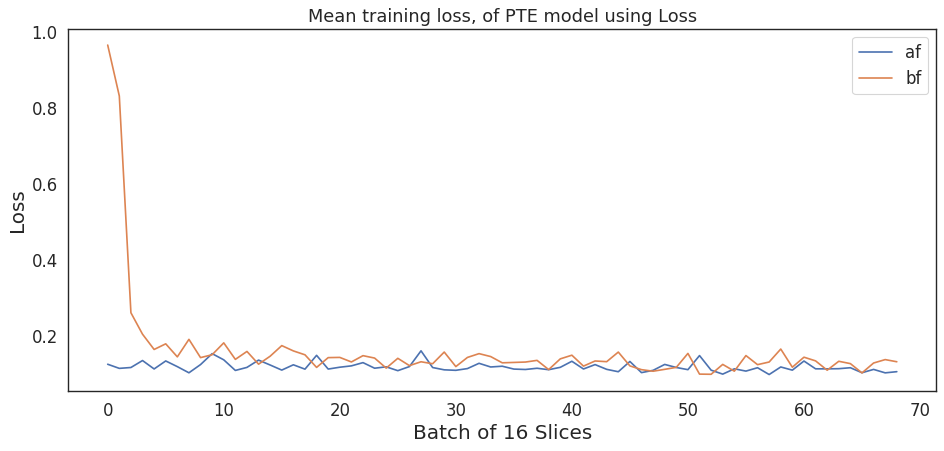

4496


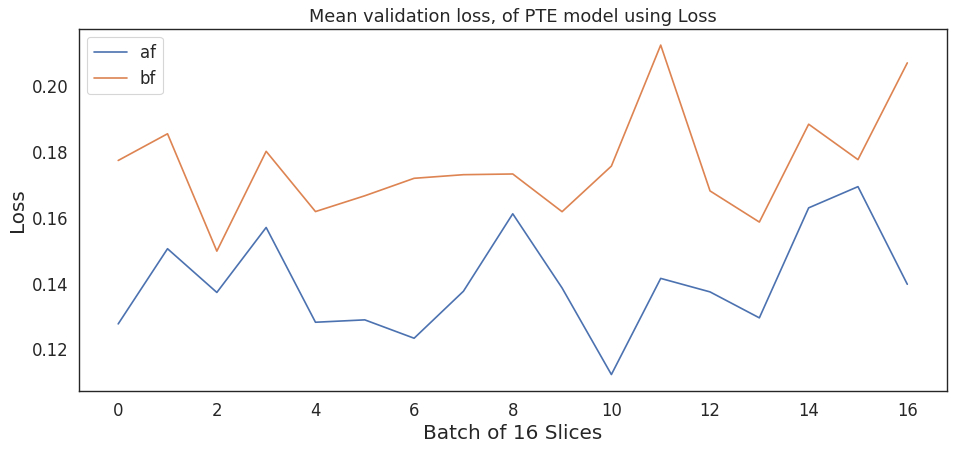

17680


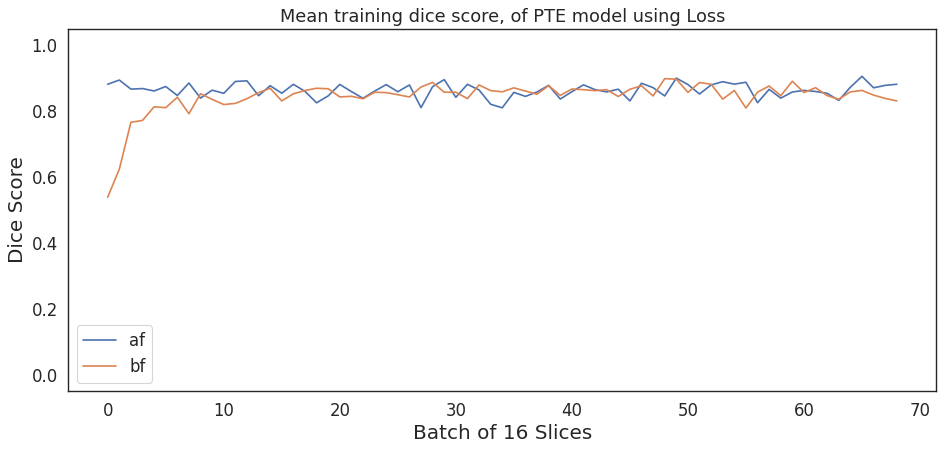

4496


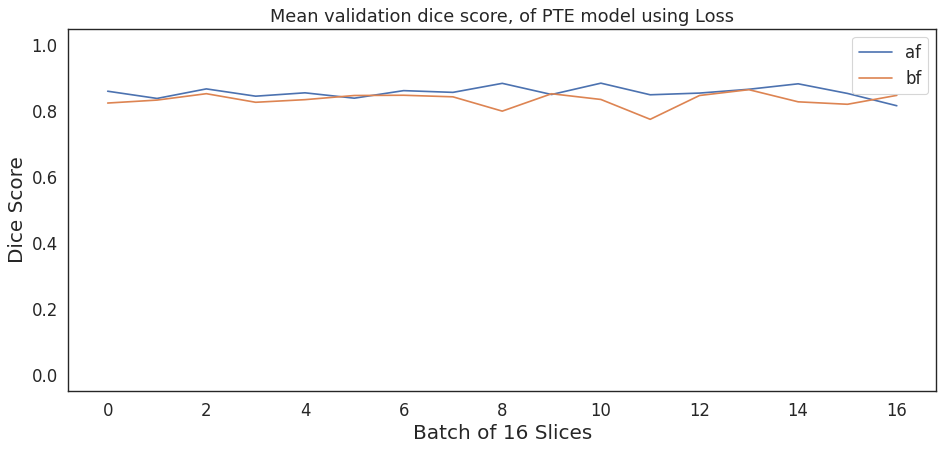

In [11]:
# Segmentation PTE output for 3 different learning rates at orders of magnitude

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["loss, ","dice score, "]
b_d = ["Loss", "Loss"]
train_val = [""]
yaxis = ["Dice Loss","Dice Score"]
t_v = ["training", "validation"]

division = 40
model = "PTE"

for switch_loss_dice in range(2):
    for switch in range(2):
        input_val = ["Checkpoints/split_data_experiments/0_Deprecated/"+model+"_division/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        figure(figsize=(14, 6), dpi=80)    
        plt.grid()
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_2" + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)
            
        input_val = ["Checkpoints/split_data_experiments/0_Deprecated/"+model+"_division_2/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0" + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")
            print(len(loss_0)*16)
            
            for i in loss_0:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)

        plt.grid()
        plt.legend(["af","bf"])
        plt.show()
        
        # These four are working
        # PFE 20 40 
        # RI 30 
        # PTE 40
        
        # PFE 30 50 50s NOT WORKING
        
        # misnamed the save files for PFE_40 into the RI_40_percent_retrain instead of PFE
        # the files can be moved over as soon as they are trained

In [3]:
import os
import zipfile

dir_name = "Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main/checkpoints"

zf = zipfile.ZipFile(dir_name + ".zip", "w")
for dirname, subdirs, files in os.walk(dir_name):
    zf.write(dirname)
    for filename in files:
        zf.write(os.path.join(dirname, filename))
zf.close()

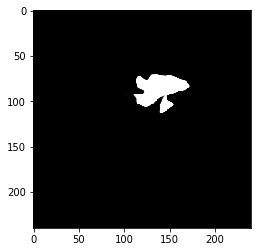

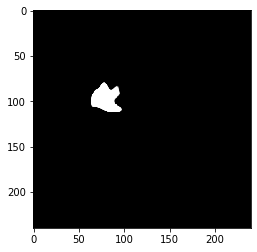

In [8]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
from matplotlib import pyplot as plt

# path1 = "Predictions/MK_6_model_predictions/Division/newDice_RI_30%_3/new/step_0/Non_binary/Brats18_TCIA10_393_1.nii.gz"

#standard code

# 09_254
# 13_615
# 10_639

slice_val = 90
a = ["09_254","10_202"]
for i in range(len(a)):
    path1 = "Predictions/MK_6_model_predictions/Division_2/RI_50%/step_0/sig/Brats18_TCIA"+a[i]+"_1.nii.gz"
    path2 = "Predictions/MK_6_model_predictions/Division_2/RI_50%/step_0/Brats18_TCIA"+a[i]+"_1.nii.gz"
    
    img1 = nib.load(path1)
    data1 = img1.get_fdata()
    # data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan
    
    img2 = nib.load(path2)
    data2 = img2.get_fdata()
    
#     data3 = data1 / data2
    # data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan
    
#     print("")
#     print(np.max(data1[:,:,slice_val]))
#     print(np.min(data1[:,:,slice_val]))
    
#     data1 = np.round_((data1 / np.linalg.norm(data1)),decimals=6)
#     # print(np.unique(data1))
    
#     print("")
#     print(np.max(data1[:,:,slice_val]))
#     print(np.min(data1[:,:,slice_val]))
    
    plt.imshow(data1[:,:,slice_val], cmap='Greys_r', interpolation='nearest')
    plt.show()

#     path2 = "Predictions/MK_6_model_predictions/Division/RI_40%/step_0/sig/Brats18_TCIA"+a[i]+"_1.nii.gz"

#     img = nib.load(path2)
#     data2 = img.get_fdata()
    
#     print("")
#     print(np.max(data1[:,:,slice_val]))
#     print(np.min(data1[:,:,slice_val]))

#     plt.imshow(data2[:,:,slice_val] > 0.5, cmap='Greys_r', interpolation='nearest')
#     plt.show()

56
Predictions/MK_6_model_predictions/Division/newDice_RI_10%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PFE_10%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PTE_10%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_RI_20%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PFE_20%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PTE_20%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_RI_30%/step_2_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PFE_30%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PTE_30%/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_RI_40%_retrain/step_0_Dice_predictions.csv
56
Predictions/MK_6_model_predictions/Division/newDice_PFE_40%/step_0_Dice_predictions

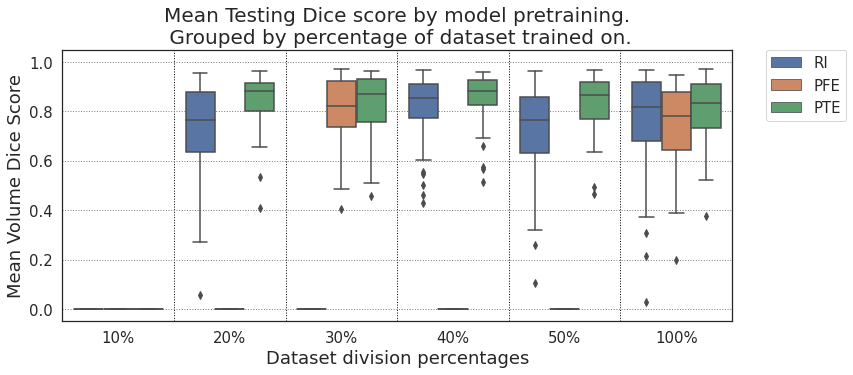

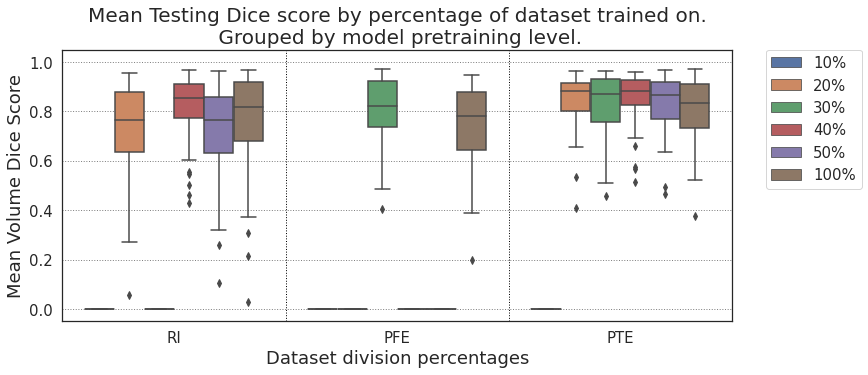

In [9]:
# Segmentation outputs for differing training data size amounts

from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

slice_count = ["All", "Tumour", "None"]
slice_count_value = 0
epoch = 0

input_1 = "Predictions/MK_6_model_predictions/Division/newDice_RI_10%/step_"+str(epoch)+"_Dice_predictions.csv"
input_2 = "Predictions/MK_6_model_predictions/Division/newDice_RI_20%/step_"+str(epoch)+"_Dice_predictions.csv"
input_3 = "Predictions/MK_6_model_predictions/Division/newDice_RI_30%/step_"+str(2)+"_Dice_predictions.csv"
input_4 = "Predictions/MK_6_model_predictions/Division/newDice_RI_40%_retrain/step_"+str(epoch)+"_Dice_predictions.csv"
input_5 = "Predictions/MK_6_model_predictions/Division/newDice_RI_50%/step_"+str(epoch)+"_Dice_predictions.csv"
input_6 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_RI_6/step_"+str(epoch)+"_Dice_predictions.csv"

input_11 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_10%/step_"+str(epoch)+"_Dice_predictions.csv"
input_12 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_20%/step_"+str(epoch)+"_Dice_predictions.csv"
input_13 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_30%/step_"+str(epoch)+"_Dice_predictions.csv"
input_14 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_40%/step_"+str(epoch)+"_Dice_predictions.csv"
input_15 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_50%/step_"+str(epoch)+"_Dice_predictions.csv"
input_16 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_PFE_6/step_"+str(epoch)+"_Dice_predictions.csv"

input_21 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_10%/step_"+str(epoch)+"_Dice_predictions.csv"
input_22 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_20%/step_"+str(epoch)+"_Dice_predictions.csv"
input_23 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_30%/step_"+str(epoch)+"_Dice_predictions.csv"
input_24 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_40%/step_"+str(epoch)+"_Dice_predictions.csv"
input_25 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_50%/step_"+str(epoch)+"_Dice_predictions.csv"
input_26 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_PTE_6/step_"+str(epoch)+"_Dice_predictions.csv"

title_output_model = ["RI", "PFE", "PTE"]
col_name = ["10%","20%","30%","40%","50%","100%"]
train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

inputs = [input_1,input_2,input_3,input_4,input_5,input_6]
inputs2 = [input_11,input_12,input_13,input_14,input_15,input_16]
inputs3 = [input_21,input_22,input_23,input_24,input_25,input_26]

index = [0,1,2,3,4,5]
input_test = [inputs, inputs2, inputs3]

for i in range(len(index)):
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    with open(input_test[0][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            x_array = np.append(x_array,float(val))
    print(len(x_array))
    print(input_test[0][index[i]])
            
    with open(input_test[1][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            y_array = np.append(y_array,float(val))
    print(len(y_array))
    print(input_test[1][index[i]])
    
    with open(input_test[2][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            z_array = np.append(z_array,float(val))
    
    print(len(z_array))
    print(input_test[2][index[i]])
    df1 = df = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),"RI":x_array,"PFE":y_array,"PTE":z_array})
    train_data_input = train_data_input.append(df1,ignore_index=True)

data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
fig = plt.figure(figsize=(12,5))
plt.grid()
ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Testing Dice score by model pretraining.\n Grouped by percentage of dataset trained on."
         ,fontsize=20)
plt.ylim(-0.05,1.05)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='black', lw=1)
plt.xlabel("Dataset division percentages",fontsize=18)
plt.ylabel("Mean Volume Dice Score",fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,5))
plt.grid()
ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Testing Dice score by percentage of dataset trained on.\n Grouped by model pretraining level."
         ,fontsize=20)
plt.ylim(-0.05,1.05)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='black', lw=1)
plt.xlabel("Dataset division percentages",fontsize=18)
plt.ylabel("Mean Volume Dice Score",fontsize=18)
plt.show()

In [6]:
import numpy as np
input_val = "Checkpoints/split_data_experiments/PFE_division_3/Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main_30_percent/epoch_0validation_dice.csv"
loss = np.genfromtxt(input_val, delimiter=',')
# print(loss)
print(np.mean(loss))

0.8437846152076495


4032
4032


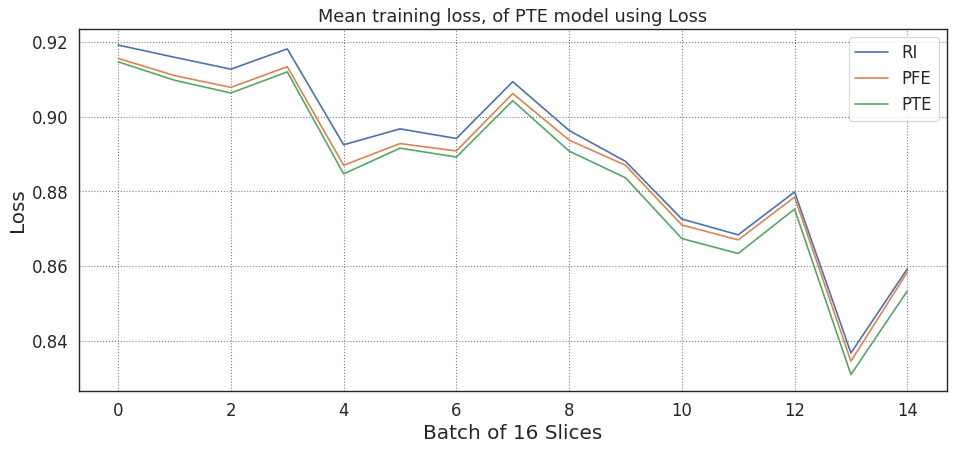

4496
4496


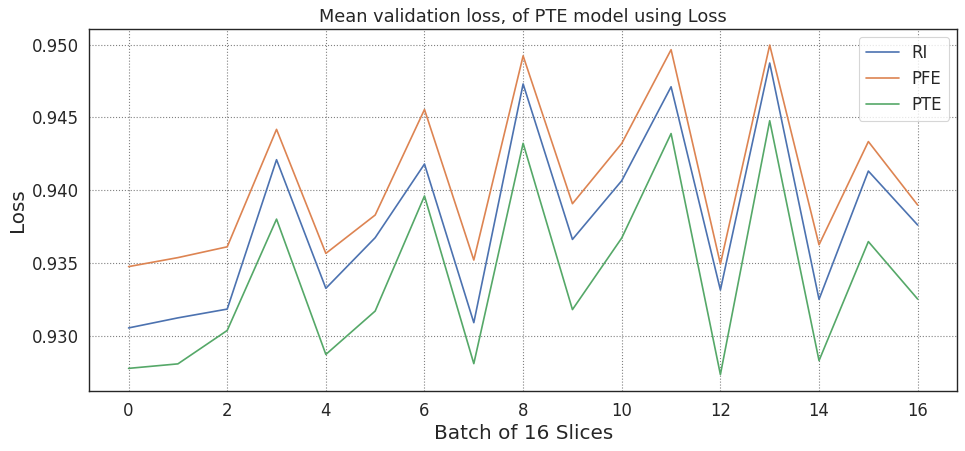

4032
4032


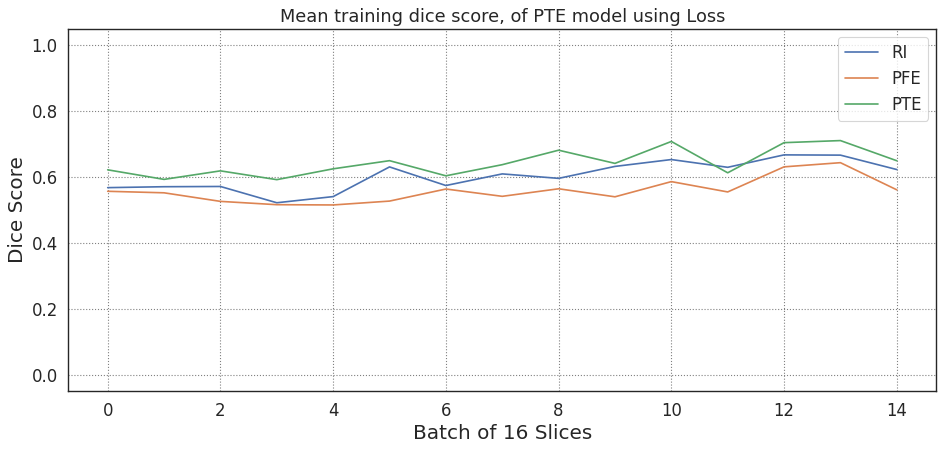

4496
4496


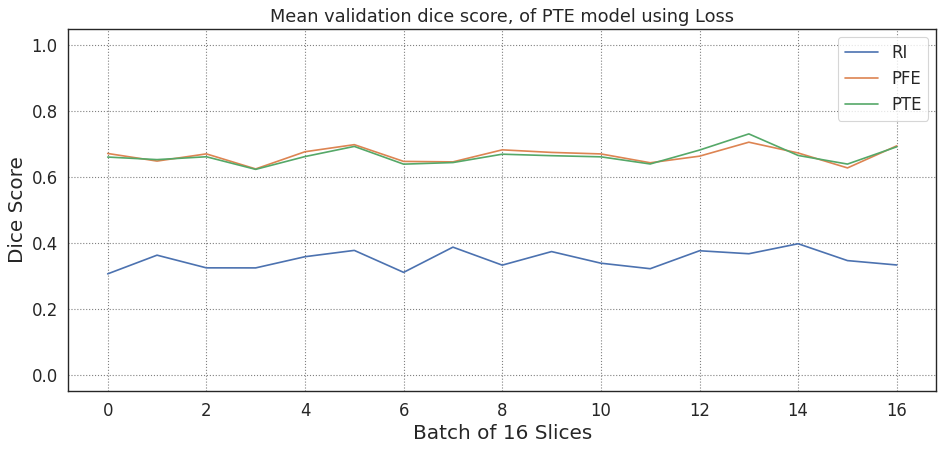

In [18]:
# Segmentation PTE output for 3 different learning rates at orders of magnitude

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["loss, ","dice score, "]
b_d = ["Loss", "Loss"]
train_val = [""]
yaxis = ["Dice Loss","Dice Score"]
t_v = ["training", "validation"]

division = 10
epoch = 0

for switch_loss_dice in range(2):
    for switch in range(2):
        model = "RI"
        input_val = ["Checkpoints/split_data_experiments/"+model+"_division_AS_BN_S_1/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        figure(figsize=(14, 6), dpi=80)    
        plt.grid()
        
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_" + str(epoch) + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
            
        ##########################################################
        ##########################################################
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)
        
        loss_0 = []
        loss_1 = []
        loss_2 = []
        loss_Nan_0 = []
        x = 0
        loss = []

        model = "PFE"
        input_val = ["Checkpoints/split_data_experiments/"+model+"_division_AS_BN_S_1/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        
        for s in range(len(input_val)):

            loss_1 = np.genfromtxt(input_val[s]+"/epoch_"+ str(epoch) + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")
            print(len(loss_1)*16)
            
            for i in loss_1:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)
            
        loss_0 = []
        loss_1 = []
        loss_2 = []
        loss_Nan_0 = []
        x = 0
        loss = []

        ##########################################################
        ##########################################################
        
        model = "PTE"
        input_val = ["Checkpoints/split_data_experiments/"+model+"_division_AS_BN_S_1/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        
        for s in range(len(input_val)):

            loss_1 = np.genfromtxt(input_val[s]+"/epoch_"+ str(epoch) + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")
            print(len(loss_1)*16)
            
            for i in loss_1:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)

        plt.grid()
        plt.legend(["RI","PFE","PTE"])
        plt.show()
        
#         These four are working
#         PFE 20 40 
#         RI 30 
#         PTE 40
        
#         PFE 30 50 50s NOT WORKING
        
#         misnamed the save files for PFE_40 into the RI_40_percent_retrain instead of PFE
#         the files can be moved over as soon as they are trained




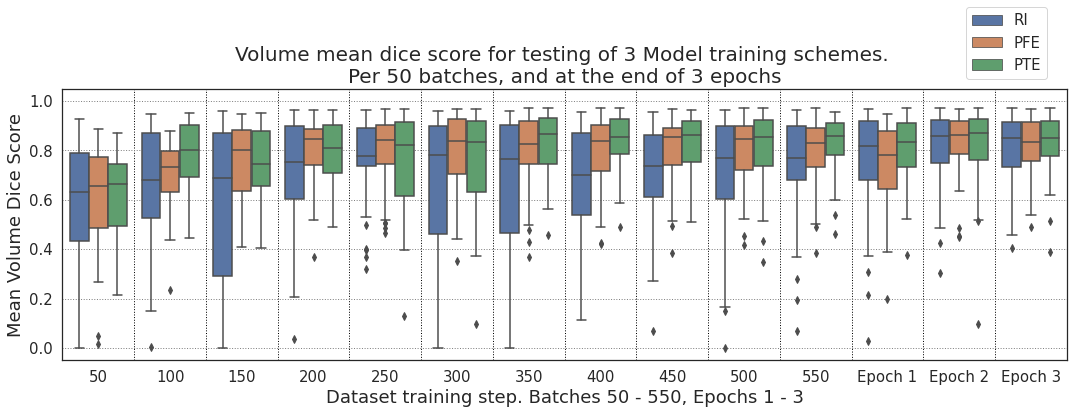

In [12]:
# Segmentation Boxplot progression for RI, PFE and PTE 

from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

title_output_model = ["RI", "PFE", "PTE"]

batch_list = np.linspace(50, 550, num=11).astype(int)
dice_output_x = pd.DataFrame(data=None, columns=list(map(str, batch_list)) + ["Epoch 1","Epoch 2","Epoch 3"])# .astype(int)
dice_output_y = pd.DataFrame(data=None, columns=list(map(str, batch_list)) + ["Epoch 1","Epoch 2","Epoch 3"])# .astype(int)
dice_output_z = pd.DataFrame(data=None, columns=list(map(str, batch_list)) + ["Epoch 1","Epoch 2","Epoch 3"])# .astype(int)

line_plot = []

index = batch_list
for training_scheme in ["RI","PFE","PTE"]:
    dice_frame_concat = pd.DataFrame(data=[], columns=range(1)).assign(Data="Base Model")
    for batch in range(len(batch_list)+3):
        if batch < len(batch_list):
            with open("Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+training_scheme+"_6/step_0_"+str(int(batch_list[batch]))+"_Dice_predictions.csv", mode='r') as infile:
                reader = csv.reader(infile)
                mydict = dict((rows[0],rows[1]) for rows in reader)

            list_U = []
            for key,val in mydict.items():
                list_U.append(float(val))

            dice_frame = pd.DataFrame(data=list_U, columns=range(1)).assign(Data=str(int(batch_list[batch])))
            dice_frame_concat = pd.concat([dice_frame_concat,dice_frame])
            dice_output = pd.melt(dice_frame_concat, id_vars=['Data'])

        if batch >= len(batch_list):
            
            with open("Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+training_scheme+"_6/step_"+str(int(batch - len(batch_list)))+"_Dice_predictions.csv", mode='r') as infile:
                reader = csv.reader(infile)
                mydict = dict((rows[0],rows[1]) for rows in reader)

            list_U = []
            for key,val in mydict.items():
                list_U.append(float(val))

            dice_frame = pd.DataFrame(data=list_U, columns=range(1)).assign(Data="Epoch " + str(int(batch - len(batch_list))+1))
            dice_frame_concat = pd.concat([dice_frame_concat,dice_frame])
            dice_output = pd.melt(dice_frame_concat, id_vars=['Data'])
              
    if training_scheme == "RI":
        dice_output_x = dice_output
    if training_scheme == "PFE":
        dice_output_y = dice_output
    if training_scheme == "PTE":
        dice_output_z = dice_output

# https://stackoverflow.com/questions/67331990/how-to-merge-multi-dataframe-and-show-them-in-one-boxplot-in-python
# combine dataframes and reset index
data = pd.concat([dice_output_x, dice_output_y, dice_output_z], keys=['RI', 'PFE', 'PTE']).reset_index(level=0)
# drop column 'class'
data = data.drop('variable', axis=1)
# rename columns
data.columns = ['Data',"class", 'value']
# fix datatype
data['class'] = data['class'].astype('str')
# print(data)

fig = plt.figure(figsize=(18,5))
plt.grid()
ax=sns.boxplot(y='value', x='class', hue='Data', data=data)
plt.legend(bbox_to_anchor=(0.90, 1.30), loc='upper left', borderaxespad=0)
plt.title("Volume mean dice score for testing of 3 Model training schemes. \nPer 50 batches, and at the end of 3 epochs"
          ,fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='black', lw=1)
plt.xlabel("Dataset training step. Batches 50 - 550, Epochs 1 - 3",fontsize=18)
plt.ylabel("Mean Volume Dice Score",fontsize=18)
plt.ylim([-0.05,1.05])
plt.show()

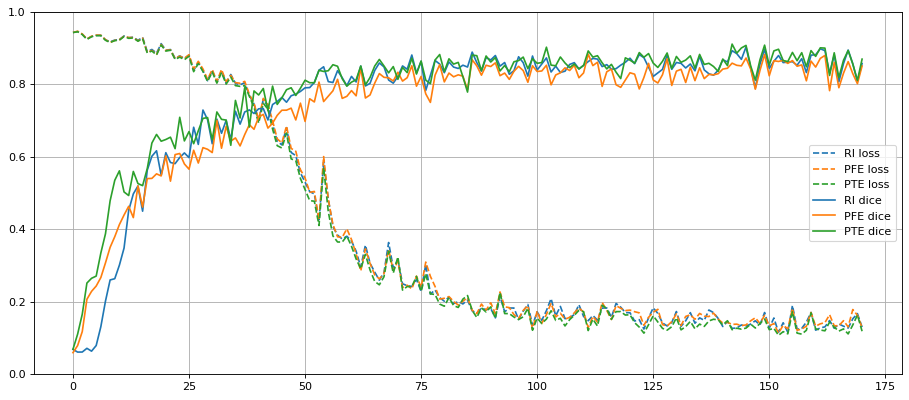

In [166]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data_clarity = 16
loss_Nan_0 = []
loss = []
x = 0

model = ["RI","PFE","PTE"]
ld = ["loss","dice"]
epoch = 0
division = 100

figure(figsize=(14, 6), dpi=80)    
plt.grid()

for type_ in range(len(ld)):
    plt.gca().set_prop_cycle(None)
    for values in model:
        input_val = "Checkpoints/split_data_experiments/"+values+"_division_AS_BN_S_1/Full_model_MK6_H16_"+values+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent/epoch_"+str(epoch)+"training_"+ld[type_]+".csv"
        loss_0 = np.genfromtxt(input_val)

        for i in loss_0:
            loss = np.append(loss,i)

        for i in range(len(loss)):
            x = x + loss[i]
            if i % data_clarity == 0:
                loss_Nan_0 = np.append(loss_Nan_0, x / data_clarity)
                x = 0

        plt.grid()
        if type_ == 1:
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:], linestyle='solid')
        else:
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:], linestyle='dashed')
        loss = []
        loss_0 = []
        loss_Nan_0 = []

plt.ylim([0,1])
plt.legend(["RI loss","PFE loss","PTE loss"]+["RI dice","PFE dice","PTE dice"])
plt.show()

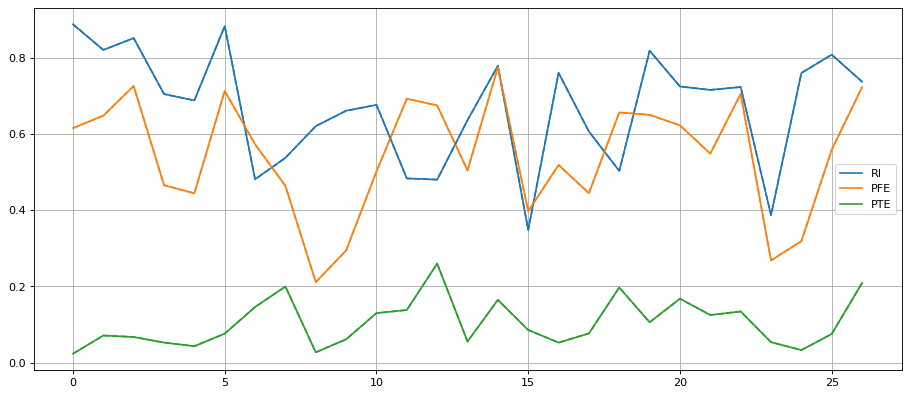

In [158]:
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 

data_clarity = 2
loss_Nan_0 = []
loss = []
x = 0

model = ["RI","PFE","PTE"]
ld = ["loss","dice"]
epoch = 2
division = 50

figure(figsize=(14, 6), dpi=80)    
plt.grid()

for type_ in range(len(ld)):
    plt.gca().set_prop_cycle(None)
    for values in model:
        input_val = "Predictions/MK_7_model_predictions/"+values+"_division_AS_BN_S_1/"+values+"_"+str(division)+"%/step_2_Dice_predictions_sigmoid.csv"
        #input_val = "Checkpoints/split_data_experiments/"+values+"_division_AS_BN_S_1/Full_model_MK6_H16_"+values+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent/epoch_"+str(epoch)+"training_"+ld[type_]+".csv"
        with open(input_val, mode='r') as infile:
            reader = csv.reader(infile)
            mydict = dict((rows[0],rows[1]) for rows in reader)
            for key,val in mydict.items():
                loss_0 = np.append(loss_0,float(val))

        for i in loss_0:
            loss = np.append(loss,i)

        for i in range(len(loss)):
            x = x + loss[i]
            if i % data_clarity == 0:
                loss_Nan_0 = np.append(loss_Nan_0, x / data_clarity)
                x = 0

        plt.grid()
        if type_ == 1:
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:], linestyle='dashed')
        else:
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:], linestyle='solid')
        loss = []
        loss_0 = []
        loss_Nan_0 = []

#plt.ylim([0,1])
#plt.legend(["RI loss","PFE loss","PTE loss"]+["RI dice","PFE dice","PTE dice"])
plt.legend(model)
plt.show()